## Train a Pure CNN with less than 10000 trainable parameters using the MNIST Dataset having minimum validation accuracy of 99.40%.


In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
mnist_data = tf.keras.datasets.mnist

In [3]:
(X_train_full, y_train_full), (X_test, y_test) = mnist_data.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
print(f"train size : {len(X_train_full)}")
print(f"test size : {len(X_test)} ")

train size : 60000
test size : 10000 


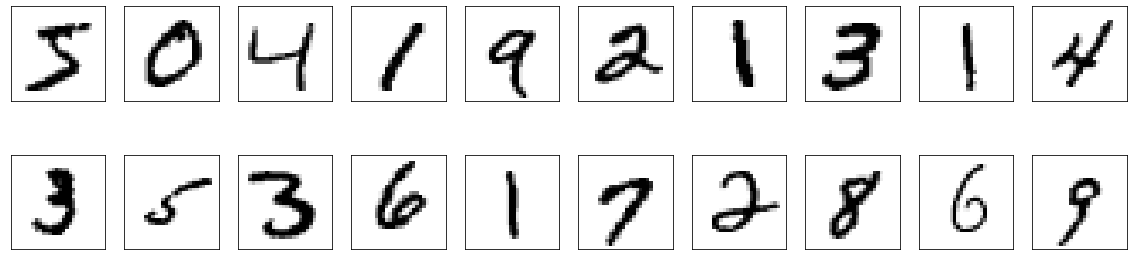

In [5]:
fig = plt.figure(figsize=(20,5))

for i in range(20):
  ax = fig.add_subplot(2,10, i+1, xticks=[],yticks=[])
  ax.imshow(np.squeeze(X_train_full[i]),cmap='binary')

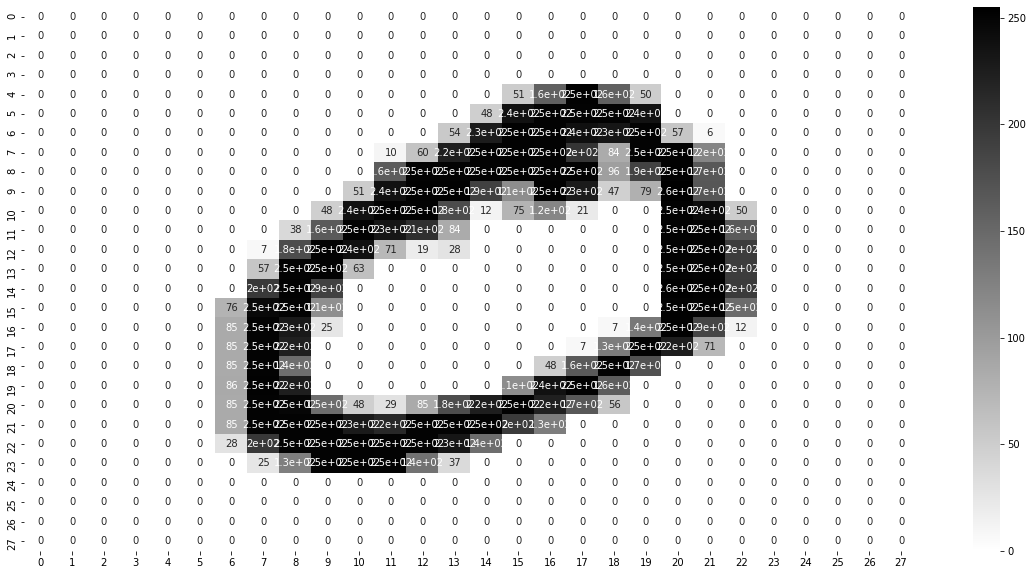

In [6]:
import seaborn as sns
plt.figure(figsize=(20,10))
sns.heatmap(X_train_full[1],cmap='binary',annot=True)

In [7]:
img_width, img_height = X_train_full[2].shape
print(img_width)
print(img_height)

28
28


In [8]:
num_classes = len(np.unique(y_train_full))
num_classes

10

In [9]:
# Reshape data
X_train_full = X_train_full.reshape(X_train_full.shape[0], img_width, img_height, 1)
X_test = X_test.reshape(X_test.shape[0], img_width, img_height, 1)
input_shape = (img_width, img_height, 1)
print(input_shape)

(28, 28, 1)


In [10]:
X_train_full = X_train_full.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

In [11]:
from keras.utils import np_utils

# break training set into training and validation sets
x_train , x_valid = X_train_full[5000:], X_train_full[:5000]
y_train, y_valid = y_train_full[5000:], y_train_full[:5000]

# print shape of training set
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)

# print shape of valid set
print('x_valid shape:', x_valid.shape)
print('y_valid shape:', y_valid.shape)

# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')


x_train shape: (55000, 28, 28, 1)
y_train shape: (55000,)
x_valid shape: (5000, 28, 28, 1)
y_valid shape: (5000,)
55000 train samples
10000 test samples
5000 validation samples


In [12]:
model1 = tf.keras.models.Sequential()
model1.add(tf.keras.layers.Conv2D(filters=16,kernel_size=(3,3),activation='relu',input_shape=[28,28,1]))
model1.add(tf.keras.layers.MaxPool2D())
model1.add(tf.keras.layers.Dropout(rate=0.4))
model1.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model1.add(tf.keras.layers.MaxPool2D())
model1.add(tf.keras.layers.Dropout(rate=0.3))
model1.add(tf.keras.layers.Conv2D(filters=16,kernel_size=(3,3),activation='relu'))
model1.add(tf.keras.layers.MaxPool2D())
model1.add(tf.keras.layers.Flatten())
model1.add(tf.keras.layers.Dense(units=16,activation='relu'))
model1.add(tf.keras.layers.Dense(units=10,activation='softmax'))

In [13]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 16)          4

In [14]:
LOSS_FUN = tf.keras.losses.sparse_categorical_crossentropy
OPTIMIZERS = 'adam'
METRICES = ['accuracy']

model1.compile(optimizer=OPTIMIZERS,loss=LOSS_FUN,metrics=METRICES)

In [19]:
EPOCHS = 10

from tensorflow.keras.callbacks import ModelCheckpoint 
checkpoints = ModelCheckpoint(filepath='model1.weights.best.hdf5', verbose=1, save_best_only=True)

history = model1.fit(x_train,y_train,epochs=EPOCHS,validation_data=(x_valid,y_valid),shuffle=True,callbacks=[checkpoints])

Epoch 1/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0882 - accuracy: 0.9715 - val_loss: 0.0562 - val_accuracy: 0.9838

Epoch 00001: val_loss improved from inf to 0.05624, saving model to model1.weights.best.hdf5
Epoch 2/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0869 - accuracy: 0.9725 - val_loss: 0.0542 - val_accuracy: 0.9836

Epoch 00002: val_loss improved from 0.05624 to 0.05419, saving model to model1.weights.best.hdf5
Epoch 3/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0881 - accuracy: 0.9716 - val_loss: 0.0543 - val_accuracy: 0.9852

Epoch 00003: val_loss did not improve from 0.05419
Epoch 4/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0880 - accuracy: 0.9720 - val_loss: 0.0612 - val_accuracy: 0.9824

Epoch 00004: val_loss did not improve from 0.05419
Epoch 5/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0845 - accuracy: 0.9729 - val_loss: 0.0599 - val_a

In [20]:
# load the weights that yielded the best validation accuracy
model1.load_weights('model1.weights.best.hdf5')

In [22]:
# evaluate test accuracy
score = model1.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 98.8000%


In [23]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.088211,0.971509,0.056239,0.9838
1,0.086919,0.972491,0.054194,0.9836
2,0.088133,0.971582,0.054312,0.9852
3,0.088011,0.971982,0.061169,0.9824
4,0.084474,0.972927,0.059911,0.9828
5,0.083781,0.972818,0.050982,0.9846
6,0.084886,0.972291,0.051821,0.9852
7,0.085193,0.972582,0.050700,0.9852
8,0.084350,0.973382,0.050505,0.9860
9,0.082314,0.973782,0.051833,0.9852


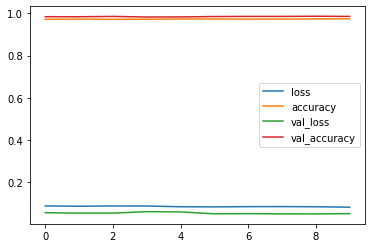

In [24]:
pd.DataFrame(history.history).plot()

In [25]:
model1.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0411 - accuracy: 0.9880


[0.041133806109428406, 0.9879999756813049]